In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Lab 2 : Web scraping and  API requests

In this lab exercise you will practice scraping data from a website, as well as doing some priliminary analysis on them.

__Deadline: Tuesday, Feb 23 11:59__



## Part 1: Scraping Data From Wikipedia

We have completed a similar task during lecture. You have to scrap a specific page of Wikipedia and answer some questions regarding the data you have collected. 
You have to get the data about different countries and their respective populations from the following page:
[https://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population](https://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population)

This page contains multiple tables for past and future population of countries. For the first part of this lab do the following:

1. Fetch the data from wikipedia with "requests" library
2. Parse html data with BeautifulSoup library
3. Use BeautifulSoup to extract specific tables
4. Combine the tables and convert the data into a dictionary 
5. Make a pandas dataframe from the dictionary 
6. Answer some questions and do some basic visualization!



### 1.1 Get the data from wikipedia (5 pts)

Use "requests" library. 

In [1]:
# Your code here 
import requests
from bs4 import BeautifulSoup

url = requests.get("https://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population")


### 1.2 Parse html data with BeautifulSoup

Parse the data using BeautifulSoup. Remember that BeautifulSoup has many useful attributes such as prettify(), find(attribute), and find_all(attribute). Check the documentation for more info: [https://www.crummy.com/software/BeautifulSoup/bs4/doc/](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)



#### 1.2.a Find the first title object and extract and print the string stored in it (5 pts)

In [2]:
# Your code here  
content = url.text

soup = BeautifulSoup(content, 'html5lib')

#soup.findAll('tr')

#print(soup.prettify())

all_headers = soup.find_all('h1')
all_headers


[<h1 class="firstHeading" id="firstHeading">List of countries by past and projected future population</h1>]

#### 1.2.b Find all the paragrpahs, store them in a list, and print the first 10 (5 pts) 

In [3]:
# Your code here  
paragraphs = soup.find_all('p')
paragraphs[:10]


[<p>All the figures shown here have been sourced from the International Data Base (IDB) Division of the <a href="/wiki/United_States_Census_Bureau" title="United States Census Bureau">United States Census Bureau</a>. Every individual value has been rounded to the nearest thousand, to assure data coherence, particularly when adding up (sub)totals. Although data from specific statistical offices may be more accurate, the information provided here has the advantage of being homogeneous.
 </p>,
 <p>Population estimates, as long as they are based on recent censuses, can be more easily projected into the <i>near</i> future than many <a href="/wiki/Macroeconomics" title="Macroeconomics">macroeconomic</a> indicators, such as <a class="mw-redirect" href="/wiki/GDP" title="GDP">GDP</a>, which are much more sensitive to political and/or economic crises. This means that <a class="mw-redirect" href="/wiki/Demographics" title="Demographics">demographic</a> estimates for the next five (or even ten) y

### 1.3 Extract the tables (10 pts)

We only care about the tables that contain population data. Extract all of them.

In [4]:
# Your code here  
# You need to  find all objects that include the css class “wikitable” within the soup object.

table = soup.findAll("table", {"class" : "wikitable"})

#print(table[0])


<table class="sortable wikitable" style="text-align: right">

<tbody><tr>
<th>Country (or dependent territory)</th>
<th>1950</th>
<th>1955</th>
<th>%</th>
<th>1960</th>
<th>%</th>
<th>1965</th>
<th>%</th>
<th>1970</th>
<th>%</th>
<th>1975</th>
<th>%</th>
<th>1980</th>
<th>%
</th></tr>
<tr>
<td align="left"><span class="flagicon"><img alt="" class="thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Afghanistan.svg/23px-Flag_of_Afghanistan.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Afghanistan.svg/35px-Flag_of_Afghanistan.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Afghanistan.svg/45px-Flag_of_Afghanistan.svg.png 2x" width="23"/> </span><a href="/wiki/Afghanistan" title="Afghanistan">Afghanistan</a></td>
<td>8,151</td>
<td>8,892</td>
<td>1.76</td>
<td>9,830</td>
<td>2.03</td>
<td>10,998</td>
<td>2.27</td>
<td>12,431</td>
<td>

In [5]:
# check the tables you extracted

from IPython.core.display import display, HTML
display(HTML(table[0].prettify()))

Country (or dependent territory),1950,1955,%,1960,%,1965,%,1970,%,1975,%,1980,%
Afghanistan,"8,151","8,892",1.76,"9,830",2.03,"10,998",2.27,"12,431",2.48,"14,133",2.60,"15,045",1.26
Albania,"1,228","1,393",2.56,"1,624",3.12,"1,884",3.02,"2,157",2.74,"2,402",2.17,"2,672",2.16
Algeria,"8,893","9,842",2.05,"10,910",2.08,"11,964",1.86,"13,932",3.09,"16,141",2.99,"18,807",3.10
American Samoa,20,20,0.72,21,0.20,25,4.23,28,2.08,30,1.68,33,1.81
Andorra,7,7,0.04,9,6.28,14,10.17,20,7.49,27,6.32,34,4.81
Angola,"4,118","4,424",1.44,"4,798",1.64,"5,135",1.37,"5,606",1.77,"6,051",1.54,"7,206",3.56
Anguilla,6,6,0.80,6,0.79,6,0.75,7,0.80,7,0.68,7,0.64
"<img alt="""" class=""thumbborder"" data-file-height=""460"" data-file-width=""690"" decoding=""async"" height=""15"" src=""//upload.wikimedia.org/wikipedia/commons/thumb/8/89/Flag_of_Antigua_and_Barbuda.svg/23px-Flag_of_Antigua_and_Barbuda.svg.png"" srcset=""//upload.wikimedia.org/wikipedia/commons/thumb/8/89/Flag_of_Antigua_and_Barbuda.svg/35px-Flag_of_Antigua_and_Barbuda.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/89/Flag_of_Antigua_and_Barbuda.svg/45px-Flag_of_Antigua_and_Barbuda.svg.png 2x"" width=""23""/> Antigua and Barbuda",46,52,2.19,55,1.32,60,1.70,66,2.05,69,0.73,69,0.15
Argentina,"17,151","18,928",1.99,"20,617",1.72,"22,284",1.57,"23,963",1.46,"26,082",1.71,"28,370",1.70
Armenia,"1,356","1,566",2.92,"1,869",3.61,"2,206",3.37,"2,520",2.70,"2,835",2.38,"3,134",2.03


### 1.4 Convert the tables into a dictionary  (35 pts)

Looking at the tables, we only care about the population number throughout the history. You want to associate each country with a series of population values to make a proper time series table you can use to analyze the population in a given coutnry.

First, you need to clean the tables cells from any footnote, links, commas or any garbage values. 
Once your data is cleaned, make a dictionary and combine each country with its corresponding year/population values across all three tables. An entry in your final dictionary should look like this: 


'Albania': {'1950': 1228,
            '1955': 1393,
            '1960': 1624,
            '1965': 1884,
            '1970': 2157,
            '1975': 2402,
            '1980': 2672,
            '1985': 2957,
            '1990': 3245,
            '1995': 3159,
            '2000': 3159,
            '2005': 3025,
            '2010': 2987,
            '2015': 3030,
            '2020': 3075,
            '2025': 3105,
            '2030': 3103,
            '2035': 3063,
            '2040': 2994,
            '2045': 2913,
            '2050': 2825},

One way to do it is:

1. First extract the header 
2. From your header only store values that are numeric (you can use isnumeric() function, recall that we only care about year values and we don't want to store columns represented by %
3. Once you have all the relevant column names (column that correspond to a year value), you can go over every row of the table 
    * Create a dictionary key with the country name 
    * Collect and add values corresponding to one of your column names to the dictionary

In [70]:
# Your code here  

import pandas as pd
from collections import defaultdict

header1 = table[0].findAll('th')

header2 = table[1].findAll('th')

header3 = table[2].findAll('th')

tmp = header1 + header2 + header3
header_unpolished = []

for i in tmp:
    header_unpolished.append(i.string)

header = []
    
for i in header_unpolished:
    if(i.isnumeric()):
        header.append(i)
        
#print(header)

dic = defaultdict(dict)


links = table[0].find_all('a')
names = []

for i in links:
    names.append(i.get('title'))
    
# cleaning names
names.remove('World')       
names = list(map(lambda x: str.replace(x, "The Bahamas", "Bahamas"), names)) 
names = list(map(lambda x: str.replace(x, "East Timor", "Timor-Leste"), names)) 
names = list(map(lambda x: str.replace(x, "Georgia (country)", "Georgia"), names)) 
names = list(map(lambda x: str.replace(x, "Republic of Ireland", "Ireland"), names)) 
names = list(map(lambda x: str.replace(x, "State of Palestine", "Palestine"), names)) 
names = list(map(lambda x: str.replace(x, "Collectivity of Saint Martin", "Saint Martin"), names)) 
names = list(map(lambda x: str.replace(x, "The Gambia", "Gambia"), names)) 


rows1 = table[0].find_all('tr')
rows2 = table[1].find_all('tr')
rows3 = table[2].find_all('tr')

val1 = []
val2 = []
val3 = []

for row in rows1:
    col = row.find_all('td')
    col = [e.text.strip() for e in col]
    val1.append([e for e in col if e])
    
for row in rows2:
    col = row.find_all('td')
    col = [e.text.strip() for e in col]
    val2.append([e for e in col if e])
    
for row in rows3:
    col = row.find_all('td')
    col = [e.text.strip() for e in col]
    val3.append([e for e in col if e])

val1.remove(val1[0])
val1.remove(val1[len(val1)-1])
val2.remove(val2[0])
val2.remove(val2[len(val2)-1])
val3.remove(val3[0])
val3.remove(val3[len(val3)-1])
    
for l in val1:
    for e in l:
        if e in names:
            l.remove(e)

for l in val1:
    for e in range(len(l)):
        if (e==2 or e==3 or e==4 or e==5 or e==6 or e==7):
            del l[e]

for l in val2:
    for e in l:
        if e in names:
            l.remove(e)

for l in val2:
    for e in range(len(l)):
        if (e==1 or e==2 or e==3 or e==4 or e==5 or e==6 or e==7):
            del l[e]

for l in val3:
    for e in l:
        if e in names:
            l.remove(e)

for l in val3:
    for e in range(len(l)):
        if (e==1 or e==2 or e==3 or e==4 or e==5 or e==6 or e==7):
            del l[e]
'''           
print(names)
print(val1)
print(val2)
print(val3)
'''


for i in range(len(names)):
    for j in range(len(header)):
        if j < 7:
            #print(i,j)
            dic[names[i]][header[j]] = int(val1[i][j].replace(',',''))
        elif j >=7 and j < 14:
            #print(i,j)
            dic[names[i]][header[j]] = int(val2[i][j-7].replace(',',''))
        elif j >= 14:
            #print(i,j)
            dic[names[i]][header[j]] = int(val3[i][j-14].replace(',',''))

#dic

#df = pd.read_html(content, header=0)[0]
#df.head(20)

defaultdict(dict,
            {'Afghanistan': {'1950': 8151,
              '1955': 8892,
              '1960': 9830,
              '1965': 10998,
              '1970': 12431,
              '1975': 14133,
              '1980': 15045,
              '1985': 13120,
              '1990': 13569,
              '1995': 19446,
              '2000': 22462,
              '2005': 26335,
              '2010': 29121,
              '2015': 32565,
              '2020': 36644,
              '2025': 41118,
              '2030': 45665,
              '2035': 50195,
              '2040': 54717,
              '2045': 59256,
              '2050': 63796},
             'Albania': {'1950': 1228,
              '1955': 1393,
              '1960': 1624,
              '1965': 1884,
              '1970': 2157,
              '1975': 2402,
              '1980': 2672,
              '1985': 2957,
              '1990': 3245,
              '1995': 3159,
              '2000': 3159,
              '2005': 3025,
             

###  1.5 Create a dataframe from your dictionary (10 pts)

Now that all tables are stored in a dictionary, we can convert the dictionary into a pandas dataframe.

1. Remove the "World" row 
2. Replace 'NaN' values with 0
3. Display the first 15 rows


In [71]:
# Your code here 
# the world row was removed already
df = pd.DataFrame.from_dict(dic, orient='index')
df.head(15)

,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995,...,2005,2010,2015,2020,2025,2030,2035,2040,2045,2050
Afghanistan,8151,8892,9830,10998,12431,14133,15045,13120,13569,19446,...,26335,29121,32565,36644,41118,45665,50195,54717,59256,63796
Albania,1228,1393,1624,1884,2157,2402,2672,2957,3245,3159,...,3025,2987,3030,3075,3105,3103,3063,2994,2913,2825
Algeria,8893,9842,10910,11964,13932,16141,18807,22009,25191,28322,...,32918,35950,39543,42973,45842,48149,50118,52030,53894,55445
American Samoa,20,20,21,25,28,30,33,39,48,54,...,57,56,55,54,54,53,52,51,50,50
Andorra,7,7,9,14,20,27,34,45,53,64,...,77,85,86,86,86,85,83,82,79,75
Angola,4118,4424,4798,5135,5606,6051,7206,8390,9486,11000,...,14770,17043,19626,22485,25674,29155,32910,36948,41280,45889
Anguilla,6,6,6,6,7,7,7,7,9,10,...,14,15,17,19,20,22,23,25,26,27
Antigua and Barbuda,46,52,55,60,66,69,69,65,65,69,...,82,87,93,99,104,110,114,118,121,123
Argentina,17151,18928,20617,22284,23963,26082,28370,30672,33036,35274,...,39182,41344,43432,45379,47165,48796,50273,51574,52663,53512
Armenia,1356,1566,1869,2206,2520,2835,3134,3465,3530,3131,...,3085,3072,3057,3022,2962,2884,2796,2699,2590,2469


In [ ]:
# Your code here

##### Part 2. Exploring the data 

Now let's look at the data at hand. 

#### 2.1 Plotting population  (10 pts)

Find 6 countries with highest population increase from 1950 to 2020. Plot their population growth.


India            956213
China            834446
Indonesia        196101
United States    182635
Pakistan         173337
Nigeria          173153
dtype: int64


<AxesSubplot:>

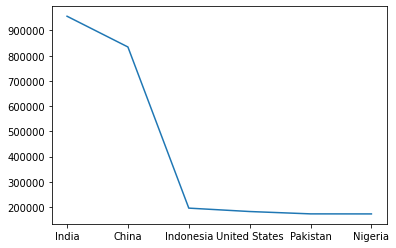

In [80]:
# Your code here
diff = (df['2020'] - df['1950'])
d = diff.sort_values(ascending=False).head(6)

print(d)
d.plot()

#### 2.2 Plotting population  (10 pts)

Repeat the previous step for data from 2020 - 2050, find 6 countries with highest population increase estimation and plot theit population growth.

India            330460
Nigeria          197274
Ethiopia         113426
Pakistan          77128
United States     63825
Tanzania          60034
dtype: int64


<AxesSubplot:>

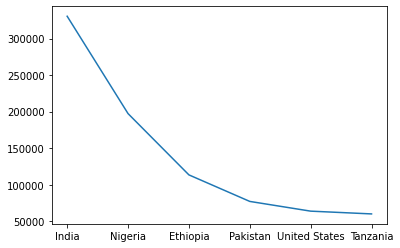

In [77]:
# Your code here
#df.columns = ["Country", "1950", "1955", "1960", "1965", "1970" "1975", "1980", "1985", "1990", "1995", "2000", "2005", "2010", "2015", "2020", "2025", "2030", "2035", "2040", "2045", "2050"]

diff = (df['2050'] - df['2020'])
ct = diff.sort_values(ascending=False).head(6)

print(ct)

ct.plot()


#### 2.3 Find 6 most populous countries ( 10 pts)

Find 6 most popoulous countries in 1960, 1980, 2000, and 2020. 
Plot and compare their population. 

<AxesSubplot:>

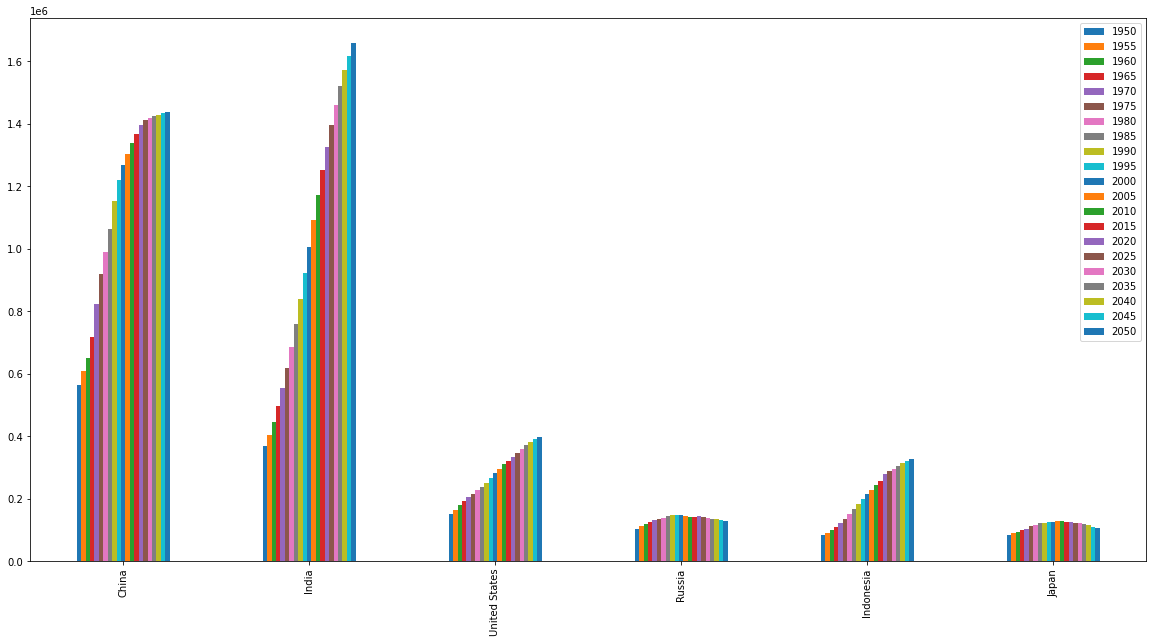

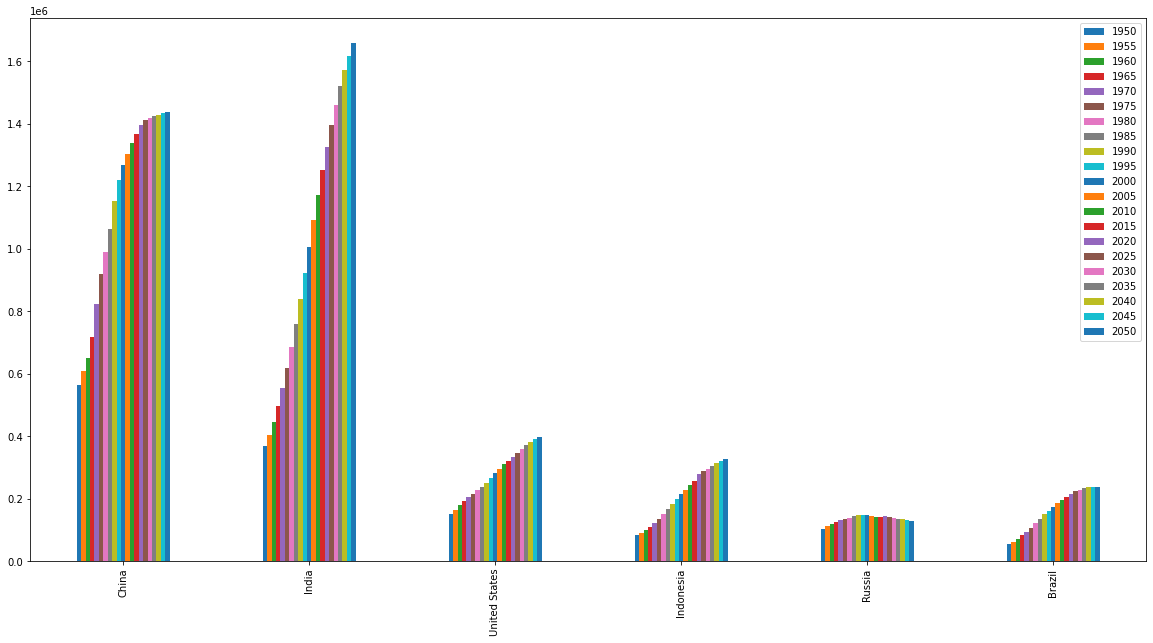

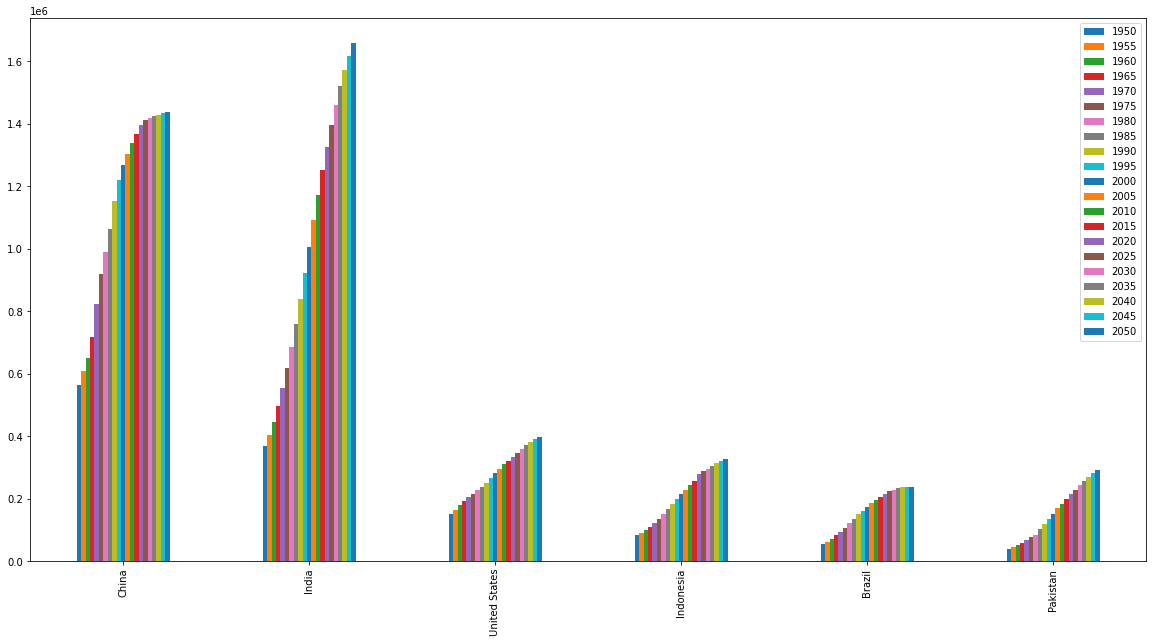

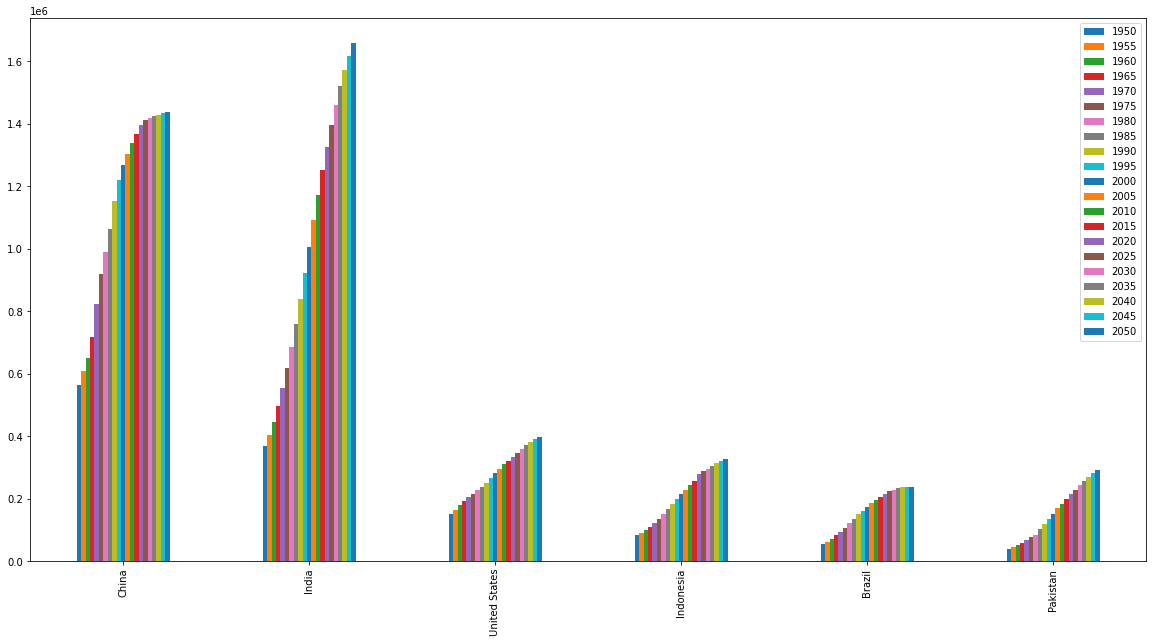

In [110]:
# Your code here
most60 = df.sort_values(['1960'], ascending=False).head(6)
most80 = df.sort_values(['1980'], ascending=False).head(6)
most2k = df.sort_values(['2000'], ascending=False).head(6)
most2k20 = df.sort_values(['2020'], ascending=False).head(6)

#print(most60)
#print(most80)
#print(most2k)
#print(most2k20)

most60.plot(kind='bar', figsize=(20,10))
most80.plot(kind='bar', figsize=(20,10))
most2k.plot(kind='bar', figsize=(20,10))
most2k20.plot(kind='bar', figsize=(20,10))